# TP3

In [10]:
import pandas as pd
from datasets import load_dataset

corpus = load_dataset("rajpurkar/squad",split="train").to_pandas()

In [11]:
corpus.head()

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...


In [47]:
def compute_average_lenghts(df: pd.DataFrame):
    """
    Compute the average lengths of context, question, and answers_text in the given DataFrame.
    For efficiency, this function creates a new column 'answers_text' in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    tuple: A tuple containing the average lengths of context, question, and answers_text.
    """
    df['answers_text'] = df['answers'].apply(lambda x: x['text'][0])
    context_average_length = df['context'].apply(len).mean()
    question_average_length = df['question'].apply(len).mean()
    answers_average_length = df['answers_text'].apply(len).mean()
    return context_average_length, question_average_length, answers_average_length

context_average_length, question_average_length, answers_average_length = compute_average_lenghts(corpus)
print(f"Average length of context: {context_average_length.item()}",f"average length of question: {question_average_length.item()}",f"average length of answers: {answers_average_length.item()}",sep="\n")

Average length of context: 754.3642164864896
average length of question: 59.57113665681115
average length of answers: 20.147273370700578


In [52]:
import matplotlib.pyplot as plt

def plot_lengths(lengths: list[tuple[str, float]]):
    """
    Plot the lengths into a bar chart.

    Parameters:
    lengths (list[tuple[str, float]]): A list of tuples containing the label and length.

    Example:
    lengths = [('context', 754.36), ('question', 59.57), ('answers_text', 20.15)]
    plot_lengths(lengths)
    """
    labels = [label for label, _ in lengths]
    lengths = [length for _, length in lengths]
    
    plt.bar(labels, lengths)
    plt.title('Average Lengths')
    plt.ylabel('Length')
    plt.show()


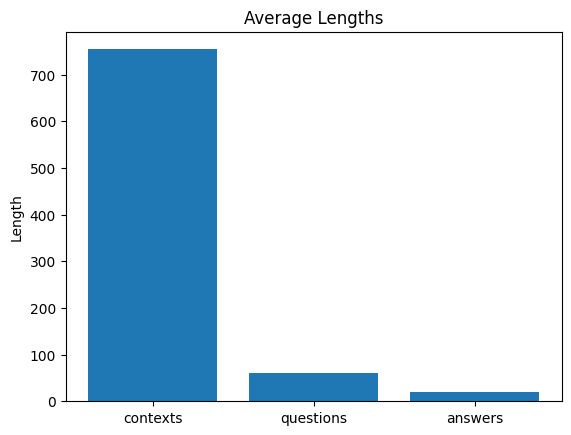

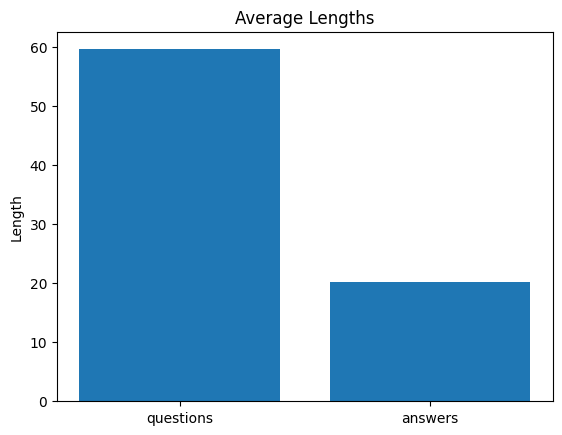

In [54]:
plot_lengths([('contexts', context_average_length), ('questions', question_average_length), ('answers', answers_average_length)])
plot_lengths([('questions', question_average_length), ('answers', answers_average_length)])

In [57]:
from collections import Counter

from collections import Counter

def get_most_frequent_words(column):
    """
    Returns the most frequent words in a given column.

    Parameters:
    column (list): A list of strings representing the column data.

    Returns:
    list: A list of tuples containing the most frequent words and their counts.
    """
    words = ' '.join(column).split()
    word_counts = Counter(words)
    most_frequent_words = word_counts.most_common(10)
    return most_frequent_words

most_frequent_words_context = get_most_frequent_words(corpus['context'])
most_frequent_words_question = get_most_frequent_words(corpus['question'])
most_frequent_words_answer_text = get_most_frequent_words(corpus['answers_text'])

print("Most frequent words in context:")
for word, count in most_frequent_words_context:
    print(f"{word}: {count}")

print("\nMost frequent words in questions:")
for word, count in most_frequent_words_question:
    print(f"{word}: {count}")

print("\nMost frequent words in answers:")
for word, count in most_frequent_words_answer_text:
    print(f"{word}: {count}")

Most frequent words in context:
the: 714958
of: 411826
and: 333246
in: 250875
to: 226001
a: 179294
The: 100002
as: 95868
is: 91741
was: 90596

Most frequent words in questions:
the: 61496
What: 37341
of: 33615
in: 21438
to: 17696
was: 17213
is: 16361
did: 15712
what: 11342
a: 10844

Most frequent words in answers:
the: 13318
of: 8982
and: 8246
to: 3468
a: 3333
in: 2852
The: 1781
or: 1281
for: 1045
million: 865


In [74]:
questions_per_topic = corpus['title'].value_counts()
questions_per_topic

title
New_York_City            817
American_Idol            802
Beyoncé                  758
Frédéric_Chopin          697
Queen_Victoria           680
                        ... 
Great_Plains              47
Tristan_da_Cunha          44
Pitch_(music)             36
Matter                    24
Myocardial_infarction     22
Name: count, Length: 442, dtype: int64

# TP 4

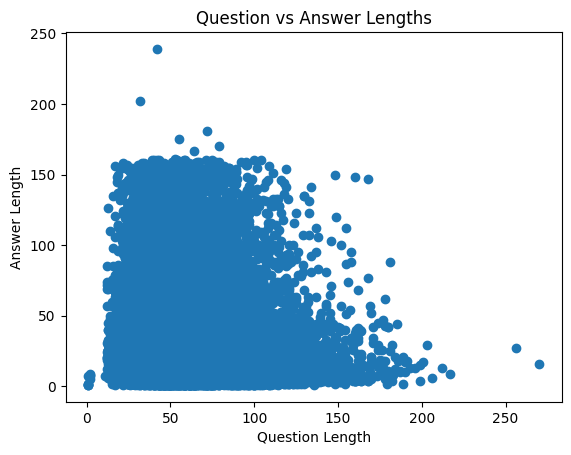

In [72]:
import matplotlib.pyplot as plt

def plot_question_answer_lengths(df):
    """
    Create a scatter plot comparing the lengths of questions and answers for each row in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.scatter(df['question'].apply(len), df['answers_text'].apply(len))
    plt.xlabel('Question Length')
    plt.ylabel('Answer Length')
    plt.title('Question vs Answer Lengths')
    plt.show()
    
plot_question_answer_lengths(corpus)

In [78]:
from scipy.stats import pearsonr

# Calcul de la corrélation et de la p-value
correlation, p_value = pearsonr(corpus['question_length'], corpus['answer_length'])

print(f'Correlation: {correlation}')
print(f'p-value: {p_value}')

Correlation: -0.033849635792580574
p-value: 1.230109325923416e-23


Il n'y a pratiquement pas de relation linéaire entre la longueur des questions et la longueur des réponses. En effet, on peut avoir une très longue question qui n'attend qu'un nom propre en réponse.

In [80]:
num_unique_topics = corpus['title'].nunique()
num_unique_topics

442

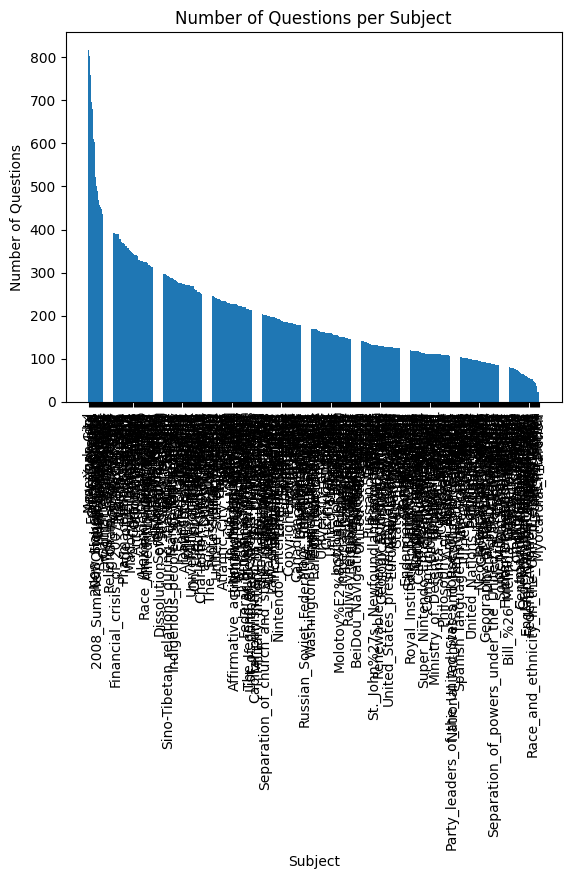

In [102]:
def plot_questions_per_topic(df):
	questions_per_subject = df['title'].value_counts()
	plt.bar(questions_per_subject.index, questions_per_subject.values)
	plt.xlabel('Subject')
	plt.ylabel('Number of Questions')
	plt.title('Number of Questions per Subject')
	plt.xticks(rotation=90)
	plt.show()

plot_questions_per_topic(corpus)

In [99]:
print("a")

a


Il y a 442 sujets uniques, et le nombre de questions par sujet est assez déséquilibré. Si on veut entraîner un modèle, il vaut mieux rééquilibrer les classes.
Pour éliminer les sujets sur-représentés et sous-représentés, on peut garder les sujets qui sont entre le premier et le troisième quartile

In [91]:
import numpy as np

def compute_median_quartiles(df: pd.DataFrame):
    """
    Compute the median and quartiles of the number of questions per subject in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.

    Returns:
    tuple: A tuple containing the median, first quartile, and third quartile of the number of questions per subject.
    """
    questions_per_subject = df['title'].value_counts()
    median = np.median(questions_per_subject)
    q1 = np.percentile(questions_per_subject, 25)
    q3 = np.percentile(questions_per_subject, 75)
    return median, q1, q3

median, q1, q3 = compute_median_quartiles(corpus)
print("Médiane:", median)
print("Premier quartile:", q1)
print("Troisième quartile:", q3)

Médiane: 169.0
Premier quartile: 112.0
Troisième quartile: 251.5


In [ ]:
df_sampled = corpus.groupby('title').apply(lambda x: x.sample(n=169, random_state=42,replace=True)).reset_index(drop=True)
df_sampled.drop_duplicates(inplace=True)

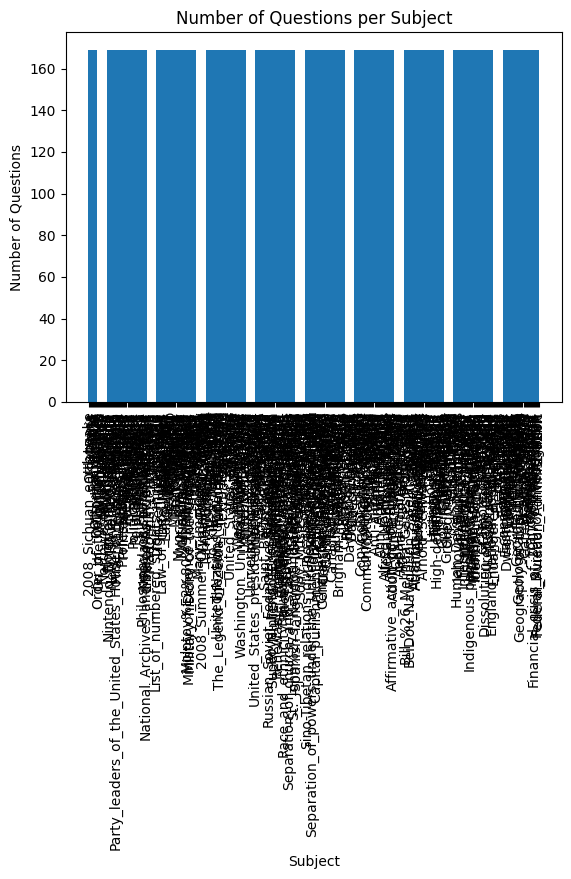

In [107]:
plot_questions_per_topic(df_sampled)

Plutôt que d'abaisser toutes les classes au même niveau, on pourrait abaisser les classes sur-représentées au niveau du troisième quartile et supprimer les données inférieures au premier quartile

In [115]:
def remove_outlier(df: pd.DataFrame, q1: int, q3: int):
    """
    Remove outliers from a DataFrame based on the given quartile values.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        q1 (int): The first quartile value.
        q3 (int): The third quartile value.

    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """
    overrepresented_titles = df['title'].value_counts()[df['title'].value_counts() > q3].index
    underrepresented_titles = df['title'].value_counts()[df['title'].value_counts() < q1].index

    # Pour chaque sujet sur-représenté, on sélectionne un échantillon de questions égal au troisième quartile
    sampled_df = pd.concat([df[df['title'] == title].sample(n=int(q3), random_state=42) for title in overrepresented_titles])

    # Ajout des sujets non sur-représentés à la DataFrame
    normal = df[~df['title'].isin(overrepresented_titles)]
    sorted_df = pd.concat([sampled_df, normal])
    sorted_df = sorted_df[~sorted_df['title'].isin(underrepresented_titles)]
    return sorted_df

sorted_df = remove_outlier(corpus, q1, q3)

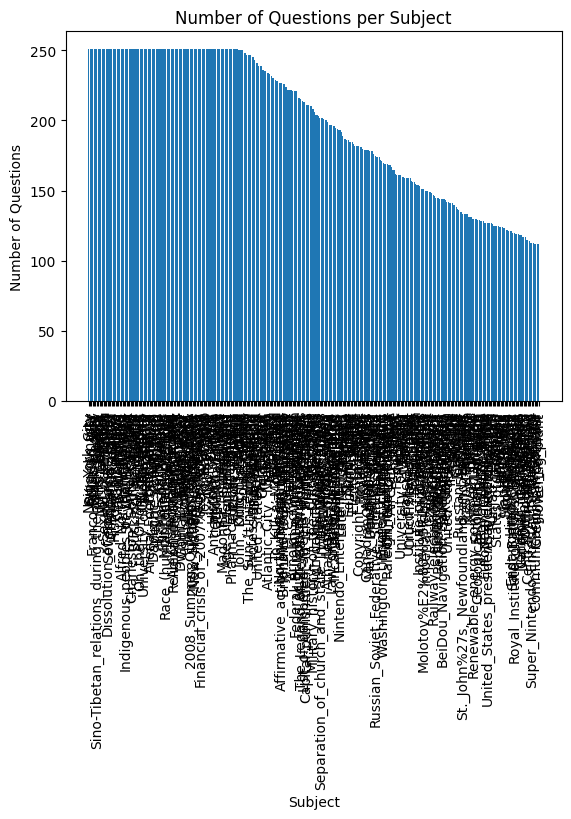

In [116]:
plot_questions_per_topic(sorted_df)